# Analysis and plotting Notebook

### TODO

Test the different modalities of decoding

### Notes:

- Currently, there seem to be a problem about decoding the whole sentence embeddings (LASER)

What works however, is:

- For words: 
    
    - everytype of decoding (embeddings, wlength) no matter the start works

- For constituents: 

    - wlength works perfectly, 
    - sum of word embeddings (1,2,3) works
    - constituent embeddings not yet

- For sentences

    - wlength works perfectly
    - sum of word embeddings (1) works



### Analyses

Create new analyses:

- Simple subject analysis of embeddings decoding
- Word embedding decoding based on constituent position

In [1]:
from dataset import analysis_subject, unique_plot
import mne
mne.set_log_level(verbose='error')
modality = 'visual'
start = 'onset'
level = 'sentence'
decoding_criterion = 'embeddings_multiple_words1'
subject = '26'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 1 words
...................................................

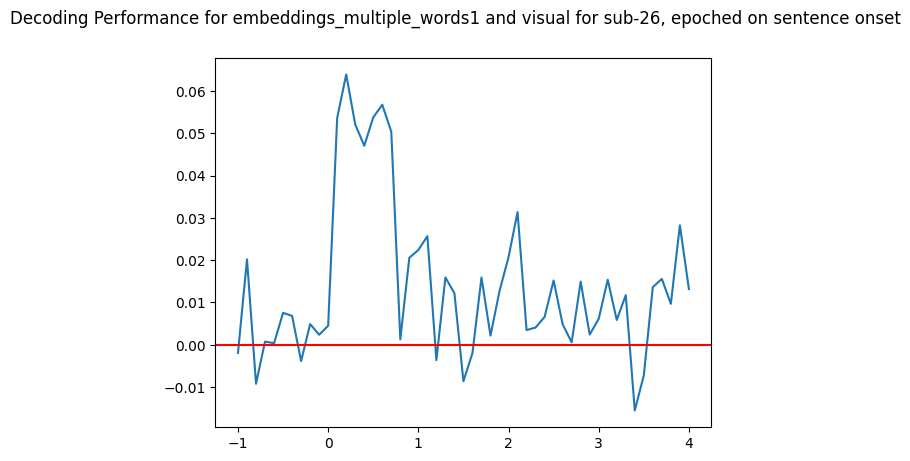

In [2]:
unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 2 words
...................................................

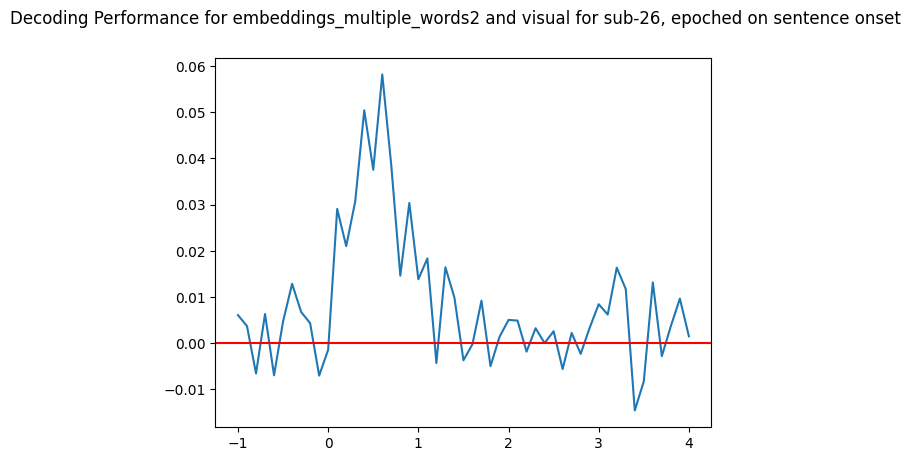

In [3]:
# Only changes from initial:
decoding_criterion = 'embeddings_multiple_words2'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Multiple word decoding: for 3 words
...................................................

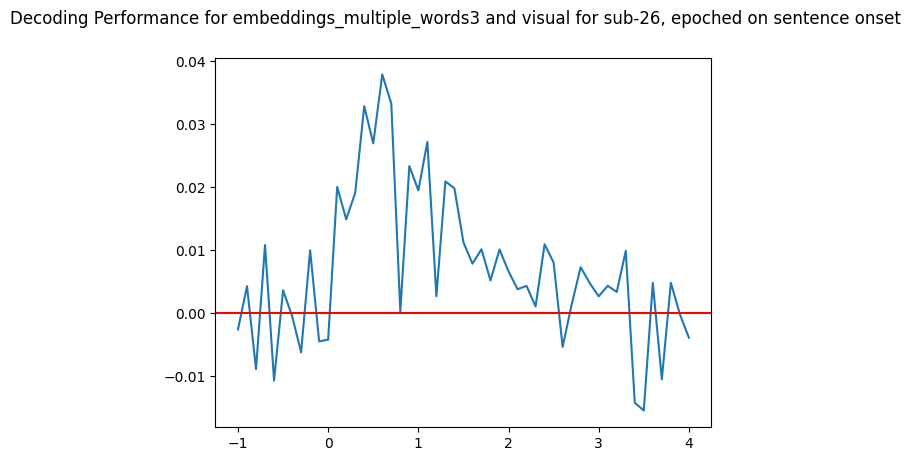

In [5]:
# Only changes from initial:
decoding_criterion = 'embeddings_multiple_words3'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

In [ ]:
# Only changes from initial:
decoding_criterion = 'embeddings'

scores = analysis_subject(subject, modality, start, level, decoding_criterion, runs=9, write=False)

unique_plot(subject, level, start, decoding_criterion, modality, from_scores=True, scores=scores)

Reading raw files for modality: visual

 Epoching for run 1, subject: 26

Reading raw files for modality: visual

 Epoching for run 2, subject: 26

Reading raw files for modality: visual

 Epoching for run 3, subject: 26

Reading raw files for modality: visual

 Epoching for run 4, subject: 26

Reading raw files for modality: visual

 Epoching for run 5, subject: 26

Reading raw files for modality: visual

 Epoching for run 6, subject: 26

Reading raw files for modality: visual

 Epoching for run 7, subject: 26

Reading raw files for modality: visual

 Epoching for run 8, subject: 26

Reading raw files for modality: visual

 Epoching for run 9, subject: 26

Embeddings decoding
